# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

['butaritari',
 'qaanaaq',
 'georgetown',
 'avarua',
 'marcali',
 'nikolskoye',
 'kapaa',
 'vaitupu',
 'hobart',
 'bredasdorp',
 'barrow',
 'grand river south east',
 'rikitea',
 'humberto de campos',
 'arraial do cabo',
 'busselton',
 'tateyama',
 'puerto ayora',
 'hienghene',
 'luderitz',
 'dikson',
 'ushuaia',
 'port lincoln',
 'yellowknife',
 'hermanus',
 'espanola',
 'kieta',
 'vaini',
 'itupiranga',
 'taolanaro',
 'shimoda',
 'kaitangata',
 'mataura',
 'hamilton',
 'flinders',
 'punta arenas',
 'kavaratti',
 'hilo',
 'karamay',
 'zemetchino',
 'langfang',
 'belushya guba',
 'bluff',
 'tacna',
 'winkler',
 'ribeira grande',
 'cockburn harbour',
 'vanavara',
 'carrick-on-suir',
 'necochea',
 'saleaula',
 'tuktoyaktuk',
 'albany',
 'soyo',
 'hithadhoo',
 'canto do buriti',
 'kavieng',
 'hasaki',
 'vila velha',
 'krasnoshchekovo',
 'cape town',
 'khorixas',
 'bathsheba',
 'sobotin',
 'worland',
 'lagos',
 'douglas',
 'fortuna',
 'viedma',
 'balimo',
 'srednekolymsk',
 'nabire',
 'che

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url= "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url =f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=bc7ee0f10dae2525ad6f44af80c01a07&units=imperial&q='

In [5]:
# create empty list
City= []
temp=[]
lat=[]
long=[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
country = []

city_counter = 1
for x in cities:
    
    #response=requests.get(query_url + x).json()     
    try:  
        response=requests.get(query_url + x).json()
        City.append(response["name"])
        temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        city_name = response["name"]
        
        print(f"Data acqusition for {city_name}")
        city_counter = city_counter +1
    
    except (KeyError, IndexError):
        print("The city was not found.... !!")
        

#Tell when data acqusition ends
print("------------------&&------------")
print("Data Acqusition complete ")
        

Data acqusition for Butaritari
Data acqusition for Qaanaaq
Data acqusition for George Town
Data acqusition for Avarua
Data acqusition for Marcali
Data acqusition for Nikolskoye
Data acqusition for Kapaa
The city was not found.... !!
Data acqusition for Hobart
Data acqusition for Bredasdorp
Data acqusition for Barrow
The city was not found.... !!
Data acqusition for Rikitea
Data acqusition for Humberto de Campos
Data acqusition for Arraial do Cabo
Data acqusition for Busselton
Data acqusition for Tateyama
Data acqusition for Puerto Ayora
Data acqusition for Hienghène
Data acqusition for Lüderitz
Data acqusition for Dikson
Data acqusition for Ushuaia
Data acqusition for Port Lincoln
Data acqusition for Yellowknife
Data acqusition for Hermanus
Data acqusition for Española
Data acqusition for Kieta
Data acqusition for Vaini
Data acqusition for Itupiranga
The city was not found.... !!
Data acqusition for Shimoda
Data acqusition for Kaitangata
Data acqusition for Mataura
Data acqusition for 

Data acqusition for Kazachinskoye
Data acqusition for Rio Grande
Data acqusition for Kiama
Data acqusition for Am Timan
Data acqusition for Aleppo Governorate
Data acqusition for Evora
Data acqusition for Torrington
The city was not found.... !!
The city was not found.... !!
Data acqusition for Dapaong
Data acqusition for Acapulco de Juárez
Data acqusition for Ust'-Karsk
Data acqusition for Vestmanna
Data acqusition for Los Llanos de Aridane
Data acqusition for Thanh Hoa
Data acqusition for Tubualá
The city was not found.... !!
Data acqusition for Turinsk
Data acqusition for Kyren
Data acqusition for Dhanwār
Data acqusition for Seddon
Data acqusition for Jalu
Data acqusition for Hambantota
Data acqusition for Praxédis Guerrero
Data acqusition for Broken Hill
Data acqusition for Nsoko
Data acqusition for Luanshya
The city was not found.... !!
Data acqusition for Ulaangom
Data acqusition for Panabá
Data acqusition for Batagay
Data acqusition for Lubango
Data acqusition for Irtyshskiy
Dat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
city_data = {"City Name": City, "Country": country, "Date": date, "Temperature": temp, "Latitude": lat,
            "Longitute": long, "Humidity": humidity, "Cloudiness": cloudiness,  "Wind Speed": wind_speed, 
            }
city_df=pd.DataFrame(city_data)

In [11]:
city_df.head()

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,1595969953,79.32,3.07,172.79,88,100,11.48
1,Qaanaaq,GL,1595969953,45.41,77.48,-69.36,68,12,5.03
2,George Town,MY,1595969760,80.60,5.41,100.34,94,40,12.17
3,Avarua,CK,1595969954,73.40,-21.21,-159.78,78,30,10.29
4,Marcali,HU,1595969954,75.20,46.59,17.41,78,11,6.08


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
city_df.sort_values(by=['Humidity'], inplace=True, ascending=False)
city_df.head(20)

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
431,Nelson Bay,AU,1595969980,53.01,-32.72,152.15,100,0,9.17
257,Semporna,MY,1595970010,75.20,4.48,118.61,100,20,1.12
422,Tawao,MY,1595970052,75.20,4.25,117.89,100,20,1.12
82,Grindavik,IS,1595969695,50.00,63.84,-22.43,100,90,9.17
328,Port Moresby,PG,1595970029,77.00,-9.44,147.18,100,90,17.22
14,Tateyama,JP,1595969956,73.99,34.98,139.87,100,75,10.29
303,Dongling,CN,1595970021,71.60,41.81,123.58,100,8,4.47
416,Mount Gambier,AU,1595970051,37.40,-37.83,140.77,100,75,8.05
329,Luba,GQ,1595970029,77.00,3.46,8.55,100,40,8.05
210,Zapolyarnyy,RU,1595969720,53.60,69.42,30.81,100,40,11.41


In [53]:
#  Get the indices of cities that have humidity over 100%.
high_humidity = city_df.loc[(city_df["Humidity"]>=100)].index
high_humidity

Int64Index([], dtype='int64')

In [61]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_df=city_df.drop(high_humidity)
clean_city_data= {
        "City Name": City, "Country": country, "Date": date, "Temperature": temp, "Latitude": lat,
            "Longitute": long, "Humidity": humidity, "Cloudiness": cloudiness,  "Wind Speed": wind_speed, 
            }
clean_city_data=pd.DataFrame(clean_city_data)
clean_city_data

,City Name,Country,Date,Temperature,Latitude,Longitute,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,1595969953,79.32,3.07,172.79,88,100,11.48
1,Qaanaaq,GL,1595969953,45.41,77.48,-69.36,68,12,5.03
2,George Town,MY,1595969760,80.60,5.41,100.34,94,40,12.17
3,Avarua,CK,1595969954,73.40,-21.21,-159.78,78,30,10.29
4,Marcali,HU,1595969954,75.20,46.59,17.41,78,11,6.08
...,...,...,...,...,...,...,...,...,...
565,Yulara,AU,1595970085,41.00,-25.24,130.99,52,0,9.17
566,Beihai,CN,1595970085,83.14,21.48,109.10,79,13,4.68
567,Araceli,PH,1595970085,82.27,10.55,119.99,76,100,7.29
568,Umm Kaddadah,SD,1595970085,79.36,13.60,26.69,61,54,19.39


In [62]:
# Extract relevant fields from the data frame

# Export the City_Data into a csv
clean_city_data.to_csv(r'../output_data/clean_cities.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [63]:
# Your first requirement is to create a series of scatter plots to showcase the following relationships:

# * Humidity (%) vs. Latitude
# * Cloudiness (%) vs. Latitude
# * Wind Speed (mph) vs. Latitude

# After each plot add a sentence or too explaining what the code is and analyzing.

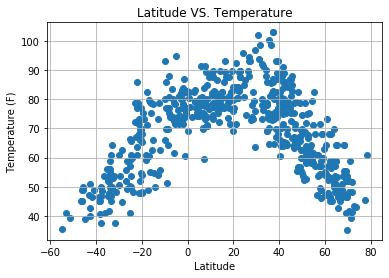

In [68]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Temperature"], marker="o")

plt.title("Latitude VS. Temperature")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandtemperature.png")

plt.show()
#This graph shows lower temperatures are reached at opposite spectrums of latitude. 
# The highest temperatures being reached around a latitude of 30.

## Latitude vs. Humidity Plot

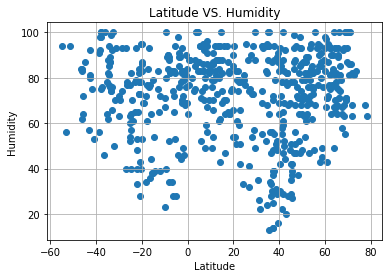

In [69]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker="o")

plt.title("Latitude VS. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandhumidity.png")

plt.show()
#This graph shows 

## Latitude vs. Cloudiness Plot

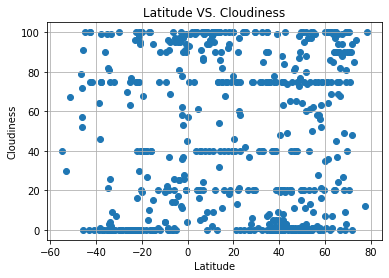

In [70]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker="o")

plt.title("Latitude VS. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandcloudiness.png")

plt.show()
#This graph shows

## Latitude vs. Wind Speed Plot

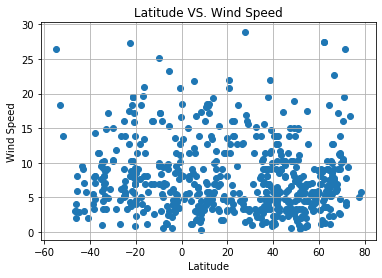

In [71]:
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker="o")

plt.title("Latitude VS. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig(r"../Images/Latitudeandwindspeed.png")

plt.show()
#This graph shows

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Your second requirement is to run linear regression on each relationship, only this time separating them 
# into Northern Hemisphere (greater than or equal to 0 degrees latitude) and Southern Hemisphere 
# (less than 0 degrees latitude):

# * Northern Hemisphere - Temperature (F) vs. Latitude
# * Southern Hemisphere - Temperature (F) vs. Latitude
# * Northern Hemisphere - Humidity (%) vs. Latitude
# * Southern Hemisphere - Humidity (%) vs. Latitude
# * Northern Hemisphere - Cloudiness (%) vs. Latitude
# * Southern Hemisphere - Cloudiness (%) vs. Latitude
# * Northern Hemisphere - Wind Speed (mph) vs. Latitude
# * Southern Hemisphere - Wind Speed (mph) vs. Latitude

# After each pair of plots explain what the linear regression is modeling such as any relationships you notice 
# and any other analysis you may have.

# **Optional** You will be creating multiple linear regression plots. To optimize your code, write a function 
# that creates the linear regression plots.

In [2]:
# Create Northern and Southern Hemisphere DataFrames
# north_hem = clean_city_data[(clean_city_data["Latitude"]>=0)].index
# north_hem_
north_hem = clean_city_data.loc[clean_city_data["Latitude"] >= 0]
north_hem
# southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

NameError: name 'clean_city_data' is not defined

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
# # Perform a linear regression on temperature vs. latitude
# (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# # Get regression values
# regress_values = x_values * slope + intercept
# print(regress_values)
# #
# # Create line equation string
# line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
# print(line_eq)
# #
# # Create Plot
# plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")

# # Label plot and annotate the line equation
# plt.xlabel('Latitude')
# plt.ylabel('Temperature')
# plt.annotate(line_eq,(20,15),fontsize=15,color="red")

# # Print r square value
# print(f"The r-squared is: {rvalue**2}")

# # Show plot
# plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [ ]:

# Your final notebook must:

# * Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
# * Perform a weather check on each of the cities using a series of successive API calls.
# * Include a print log of each city as it's being processed with the city number and city name.
# * Save a CSV of all retrieved data and a PNG image for each scatter plot.

# # Extract latitude and longitude
# lat = geo_data["results"][0]["geometry"]["location"]["lat"]
# lng = geo_data["results"][0]["geometry"]["location"]["lng"]

# # Print the latitude and longitude
# print('''
#     City: {0}
#     Latitude: {1}
#     Longitude: {2}
#     '''.format(target_city, lat, lng))